In [8]:
import numpy as np
import collections
import math

In [31]:
import matplotlib.pyplot as plt

Q6

(a)

In [33]:
#get points with #=n, dimension=d
def getNPoints(d,n):
    aList=[]
    x=np.random.normal(0,1,size=(n,d))
    for xi in x:
        xi/=np.linalg.norm(xi)
        aList.append(xi)
    return aList

In [57]:
#the function for displaying the hist0gram
def showHist(x_value,n,d):
    plt.hist(x_value,bins=20,range=[0,2])

    plt.title("the Hist of d={},n={}".format(n,d))
    plt.xlabel("inter points distance")
    plt.ylabel("number of points")

    plt.show()

In [58]:
#computer interpoint distance
def interdistance(pointList):
    n=len(pointList) #it should be 100 based on question but use len() to be general
    distanceList=[]
    for i in range(n-1):
        for j in range(i+1,n):
            distanceList.append(np.linalg.norm(pointList[i]-pointList[j]))
            
    return distanceList
    

experiment with d = 2, 5, 10, 20, 100 and n = 100

d = 2, n = 100

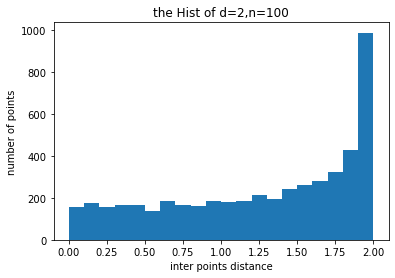

In [59]:
pointList=getNPoints(2,100)
distanceList=interdistance(pointList)
showHist(distanceList,2,100)

d = 5, n = 100

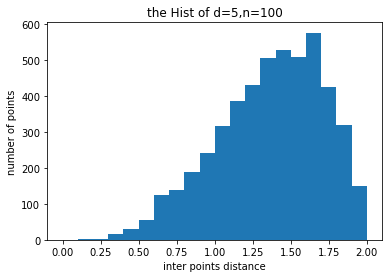

In [60]:
pointList=getNPoints(5,100)
distanceList=interdistance(pointList)
showHist(distanceList,5,100)

d=10,n=100

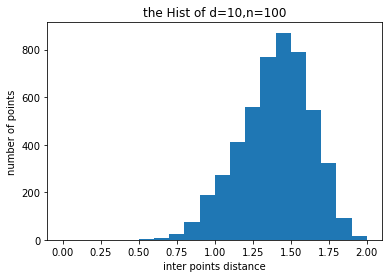

In [61]:
pointList=getNPoints(10,100)
distanceList=interdistance(pointList)
showHist(distanceList,10,100)

d=20,n=100

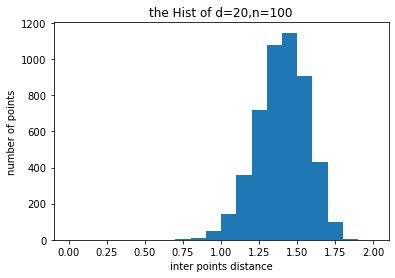

In [62]:
pointList=getNPoints(20,100)
distanceList=interdistance(pointList)
showHist(distanceList,20,100)

d=100,n=100

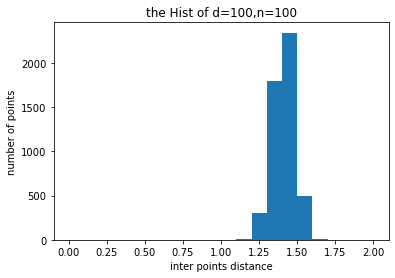

In [63]:
pointList=getNPoints(100,100)
distanceList=interdistance(pointList)
showHist(distanceList,100,100)

(b)

Since the n grows the concentration will be more obvious
So to guess a approximate answer, I did a experiment with huge dimension first

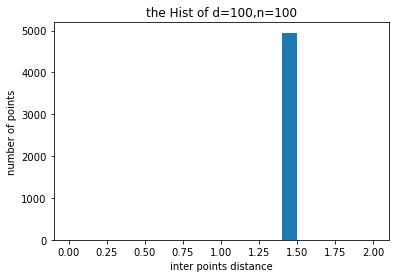

1.4142186080637633

In [68]:
pointList=getNPoints(100000,100)
distanceList=interdistance(pointList)
showHist(distanceList,100000,100)
app=sum(distanceList)/len(distanceList)
app

According to this approximate value 1.4142186080637633, I hence guess the value is sqrt(2).

(c)

In [78]:
#to use the function we alreay built
#instead of generate one sample at each step, generate them (10000) at once
pointList=getNPoints(1000,10000)
#then the xi are ith entry(pointList[i-1]) of pointList

In [79]:
u_list,s_list=[],[]
for i in range (1,10000):
    u,s=0,2
    for j in range(0,i):
        tmp=np.linalg.norm(pointList[i]-pointList[j])
        u=max(u,tmp)
        s=min(s,tmp)
    u_list.append(u)
    s_list.append(s)

histgram for two lists each

<function matplotlib.pyplot.show(close=None, block=None)>

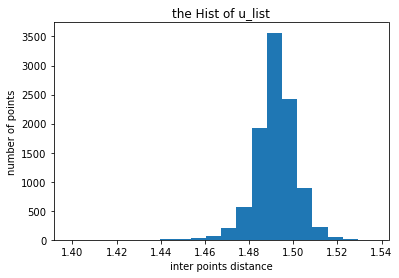

In [102]:
plt.hist(u_list,bins=20)

plt.title("the Hist of u_list")
plt.xlabel("inter points distance")
plt.ylabel("number of points")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

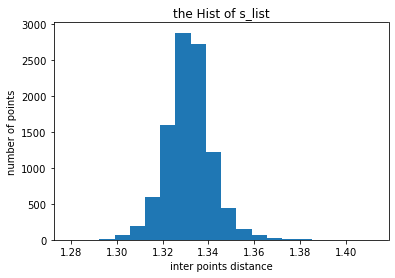

In [103]:
plt.hist(s_list,bins=20)

plt.title("the Hist of s_list")
plt.xlabel("inter points distance")
plt.ylabel("number of points")
plt.show

show them in one plot

<function matplotlib.pyplot.show(close=None, block=None)>

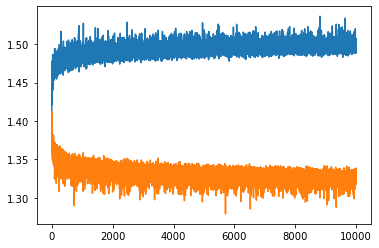

In [111]:
x=[i for i in range(2,10001)]
plt.plot(x,u_list)
plt.plot(x,s_list)
plt.show

set y-axis range to [0,2]

<function matplotlib.pyplot.show(close=None, block=None)>

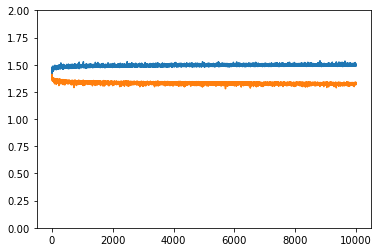

In [114]:
#set the range
x=[i for i in range(2,10001)]
plt.plot(x,u_list)
plt.plot(x,s_list)
plt.ylim(0, 2)
plt.show


Q7

In [115]:
#import dataset as the way Prof. mention in piazza
import torchvision.datasets as datasets
train_set=datasets.MNIST(root='./data',train=True,download=True,transform=None)
test_set=datasets.MNIST(root='./data',train=False,download=True,transform=None)

100%|██████████| 9912422/9912422 [00:01<00:00, 9158965.02it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


  0%|          | 0/1648877 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 9846731.70it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [117]:
train_set[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x193111A9040>, 5)

import neccessary package for the question

In [119]:
from sklearn.neighbors import KDTree

(a)

For dimensions d = 5, 10, 15, 20, 25, 30, 35, 40, 45, 50

In [140]:
aveList=[]
for d in range(5,55,5):
    #d is for demension
    trainList=getNPoints(d,60000)
    testList=getNPoints(d,100)
    tree=KDTree(trainList,leaf_size=2)
    tree.query(testList)
    aveList.append(tree.get_n_calls()/100)
    tree.reset_n_calls()
aveList

[16.58,
 274.48,
 1991.23,
 8833.11,
 22506.62,
 37335.77,
 49577.88,
 55796.16,
 58423.39,
 59179.83]

<function matplotlib.pyplot.show(close=None, block=None)>

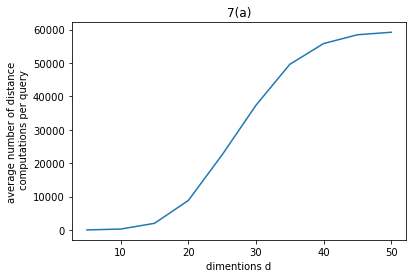

In [144]:
x=[i for i in range(5,55,5)]
plt.plot(x,aveList)
plt.xlabel("dimentions d")
plt.ylabel("average number of distance\n computations per query")
plt.title("7(a)")
plt.show

(b)

In [145]:
print(len(train_set))
print(len(test_set))

60000
10000


In [151]:
#the dataset has already downloaded
#select 60000 for training set and 100 for testset
#as the len is shown above, only need to select 100 for testset
test_Set=[]
for i in range(100):
    test_Set.append(test_set[i])

convert the dataset, transefer the image to vector

In [168]:
trainSet=[]
testSet=[]
for sample in train_set:
    trainSet.append((np.reshape(sample[0], (1, -1)))[0])
for sample in test_Set:
    testSet.append((np.reshape(sample[0], (1, -1)))[0])

In [170]:
tree=KDTree(trainSet,leaf_size=2)
tree.query(testSet)
ave=(tree.get_n_calls()/100)
tree.reset_n_calls()

In [171]:
ave

29542.31

(3)

to make sure the above anwer is correct, I tried two more test set with different selection 

In [173]:
test_set2=[]
for i in range(0,1010,10):
    test_set2.append((np.reshape(test_set[i][0], (1, -1)))[0])

In [175]:
tree.query(test_set2)
ave2=(tree.get_n_calls()/100)
tree.reset_n_calls()
ave2

32464.55

In [176]:
test_set3=[]
for i in range(6,1016,10):
    test_set3.append((np.reshape(test_set[i][0], (1, -1)))[0])

tree.query(test_set3)
ave3=(tree.get_n_calls()/100)
tree.reset_n_calls()
ave3

29690.38

it seems close to answer in question(b)
that is to say the answer seem to be around 30000

now we print the answer in (a)

In [177]:
print(aveList)

[16.58, 274.48, 1991.23, 8833.11, 22506.62, 37335.77, 49577.88, 55796.16, 58423.39, 59179.83]


the answer in question (b) is between 22506.62 and 37335.77 which are given by dimension 25 and 30


therefore, my rough answer is 27 (to be honest, I think 26,27,28,29 are reasonable).